
Bad key text.latex.unicode in file /Users/fukai/.matplotlib/stylelib/paper-default2.mplstyle, line 46 ('text.latex.unicode: True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution
Duplicate key in file PosixPath('/Users/fukai/.matplotlib/stylelib/paper-default.mplstyle'), line 38 ('legend.framealpha: 1.0')
the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","OPENCV","SCIPY"]
findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans.


(147, 128, 128) uint16


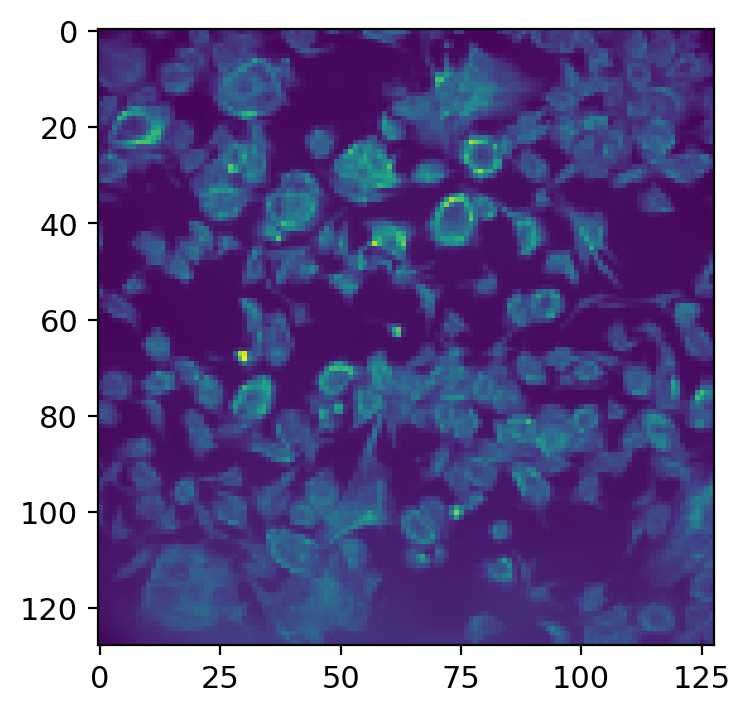

(100, 128, 171) uint8


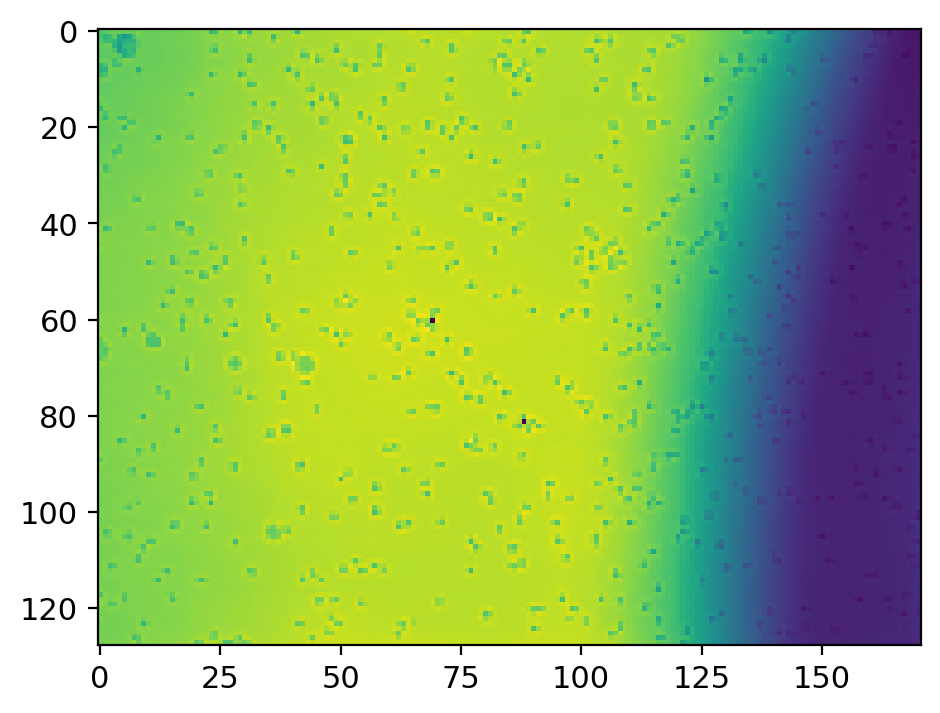

(189, 128, 171) uint8


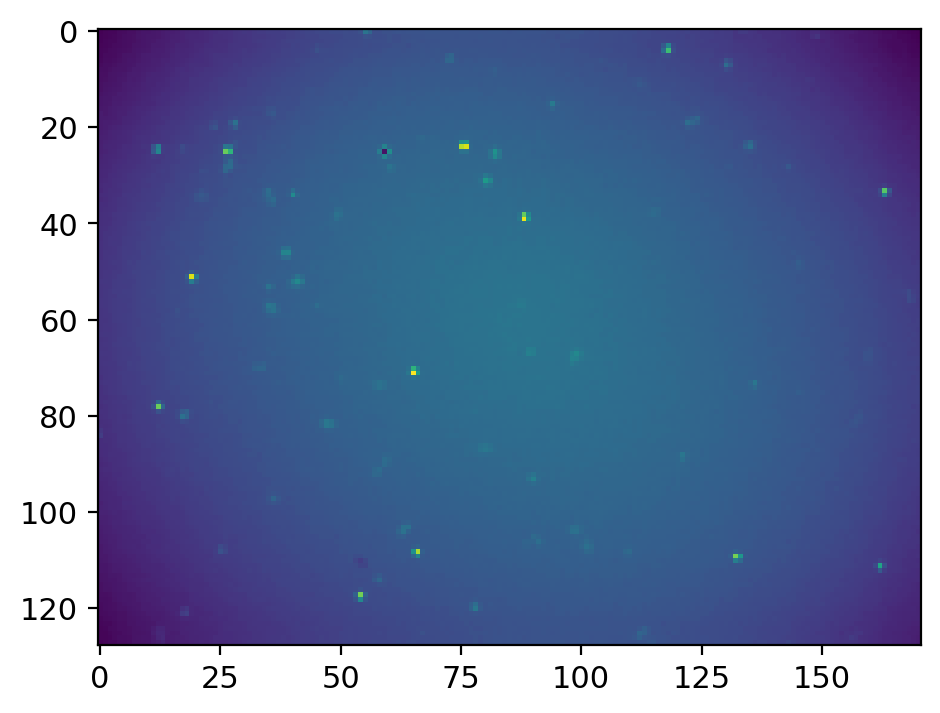

(200, 128, 171) uint8


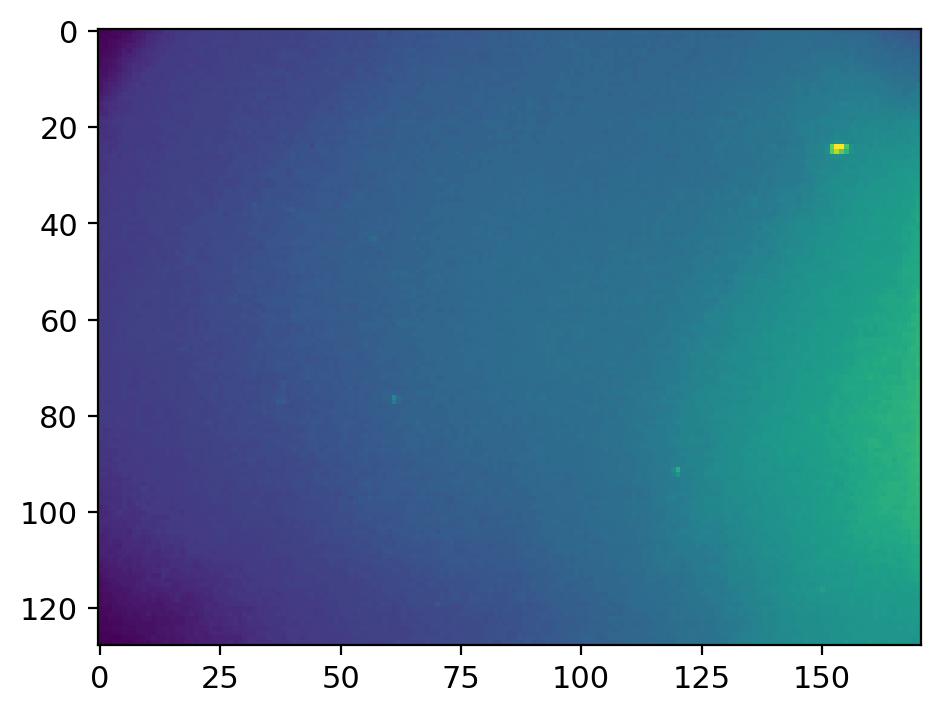

(63, 128, 128) uint16


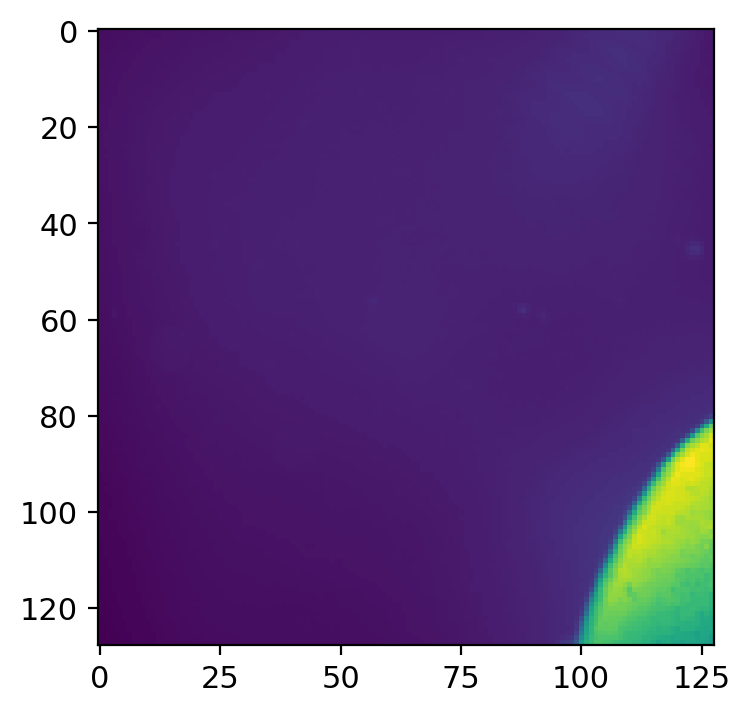

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from basicpy import BaSiC

images = {}
keys = ["cell_culture","timelapse_brightfield","timelapse_nanog","timelapse_pu1","wsi_brain"]
for k in keys:
    d=np.load(f"../data/{k}.npz")
    im=d["images"]
    print(im.shape, im.dtype)
    plt.imshow(im[10])
    images[k]=im
    plt.show()

# Exporting data for test

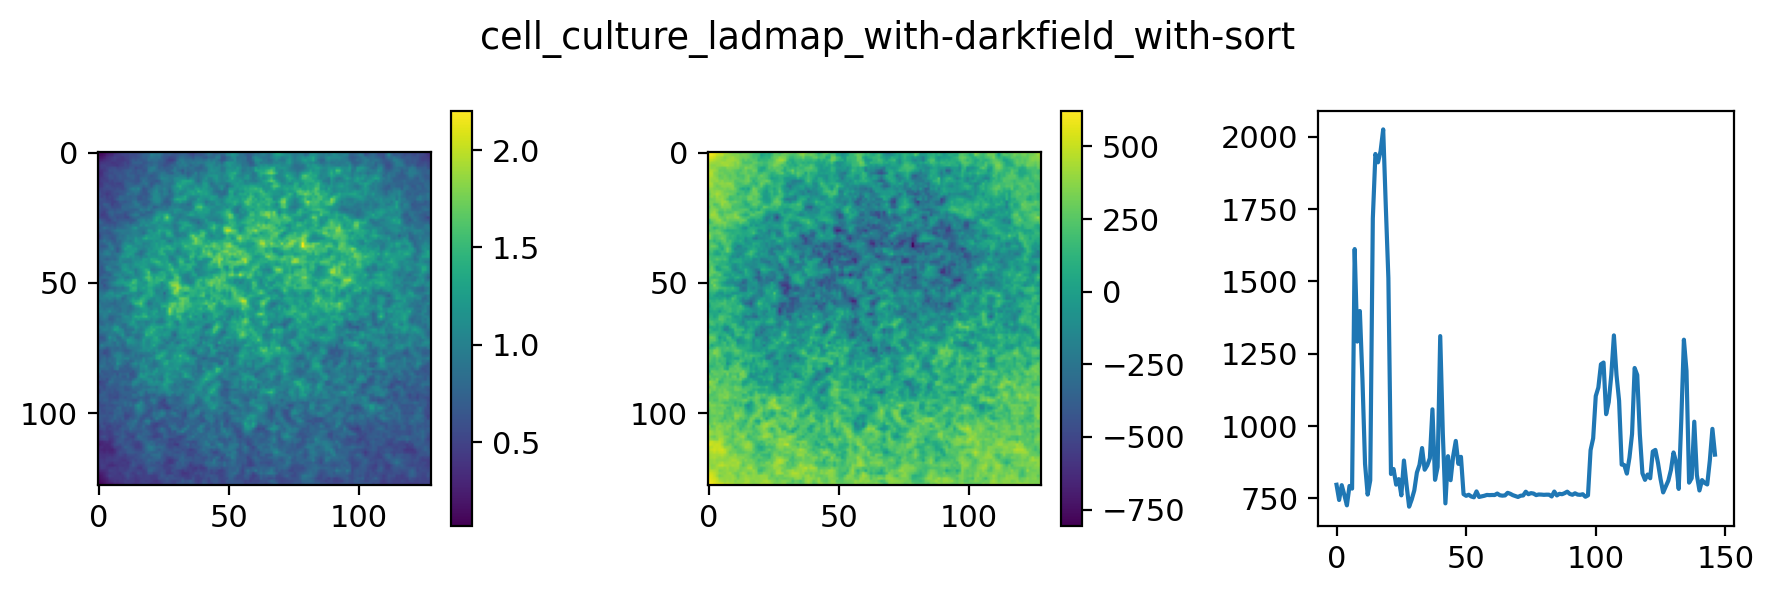

In [3]:
from basicpy import BaSiC
from itertools import product
import os
import logging
logging.getLogger("basicpy").setLevel(level=logging.WARNING)

os.makedirs("../tests/data/fit", exist_ok=True)

for k,im in images.items():
    for fitting_mode, get_darkfield, sort_intensity in \
        product(["ladmap","approximate"],[True,False],[True,False]):
        b = BaSiC(fitting_mode=fitting_mode, 
#                  lambda_flatfield_coef=1.0 / 400 * 0.5 if fitting_mode=="approximate" else 0.1,
#                  lambda_darkfield_coef=0.2 if fitting_mode=="approximate" else 0.2,
                  get_darkfield=get_darkfield, 
                  sort_intensity=sort_intensity)
        b.fit(im)
        plt.figure(figsize=(9,3))
        plt.subplot(131)
        plt.imshow(b.flatfield)
        plt.colorbar()
        plt.subplot(132)
        plt.imshow(b.darkfield)
        plt.colorbar()
        plt.subplot(133)
        plt.plot(b.baseline)
        boolstr = lambda x:"with" if x else "without"
        k2=f"{k}_{fitting_mode}_{boolstr(get_darkfield)}-darkfield_{boolstr(sort_intensity)}-sort"
        plt.suptitle(k2)
        plt.tight_layout()
        plt.savefig(f"../tests/data/fit/plots/{k2}.png")
        plt.show()
        np.savez_compressed(f"../tests/data/fit/{k2}.npz",
            image_name=k,
            flatfield=b.flatfield,
            darkfield=b.darkfield,
            baseline=b.baseline,
            params=b.dict()
        )
        break
    break